In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/My Drive/foodhub_order.csv')
df

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#find the shape of file

df.shape


(1898, 9)

In [ ]:
#find if there are missing values

df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
#check for duplicated values

df.duplicated().sum()

0

In [12]:
#substituting ratings that are not given
df.loc[df['rating']=='Not given','rating']=0

In [ ]:
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898.0,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4.0,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,0.0,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736.0,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


# **Univariate** **Analysis**


In [ ]:
def hist_bar_plots(df,var,figsize=(15,10),bins=10,kde=False):
  f, (ax_bar,ax_hist)= plt.subplots(
                            figsize=figsize,
                            sharex=True,
                            nrows=2,
                            gridspec_kw={'height_ratios':(0.25,0.75)}
  )#creating 2 subplots
  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
  sns.histplot(
                  data=df,
                  x=var,
                  kde=kde,
                  palette='PuBu',
                  ax=ax_hist,bins=bins
  )if bins else sns.histplot(
       data=df,x=var,kde=kde,palette='PuBu',ax=ax2
  )#for histogram
  ax_hist.axvline(
          df[var].mean(),color='green',linestyle='-'
  )
  ax_hist.axvline(
       df[var].median(),color='black',linestyle='--'
  )


<ipython-input-64-16920ab2f4a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-64-16920ab2f4a3>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-64-16920ab2f4a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-64-16920ab2f4a3>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-64-16920ab2f4a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for 

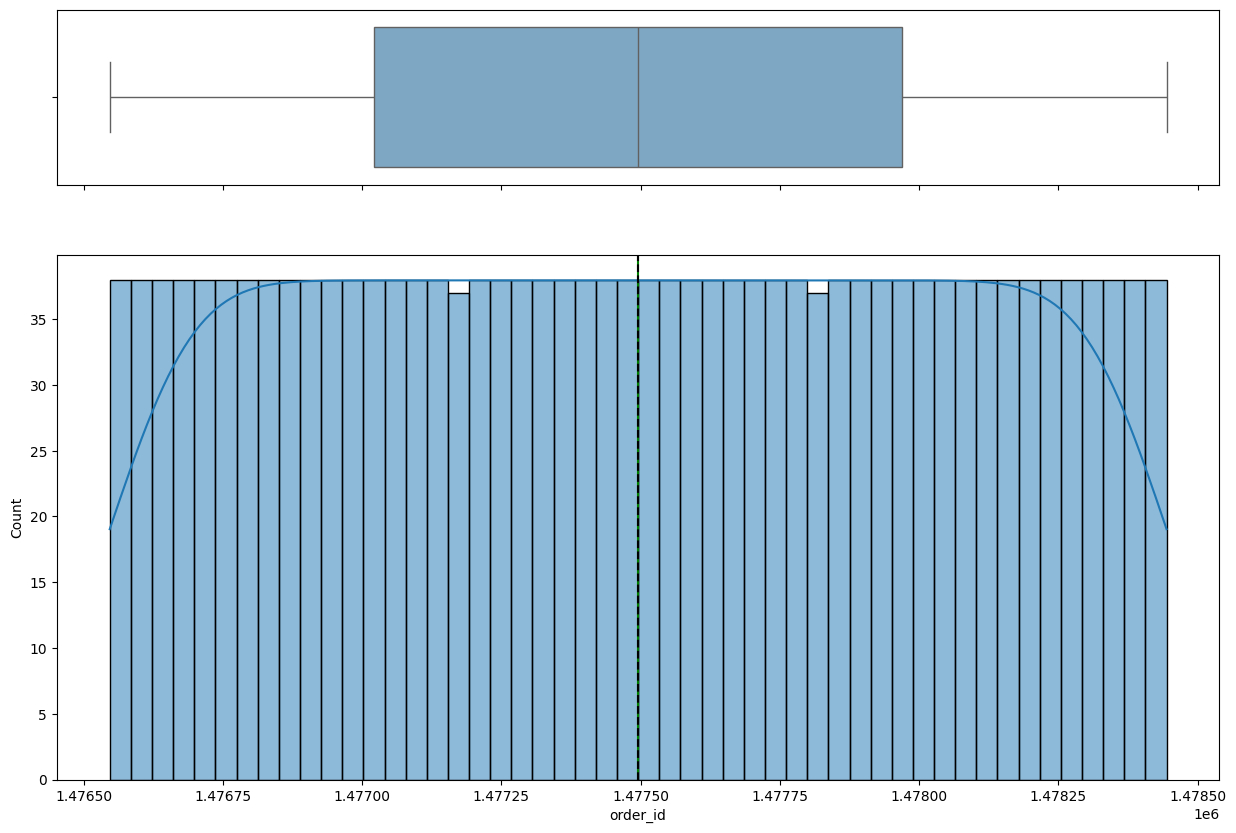

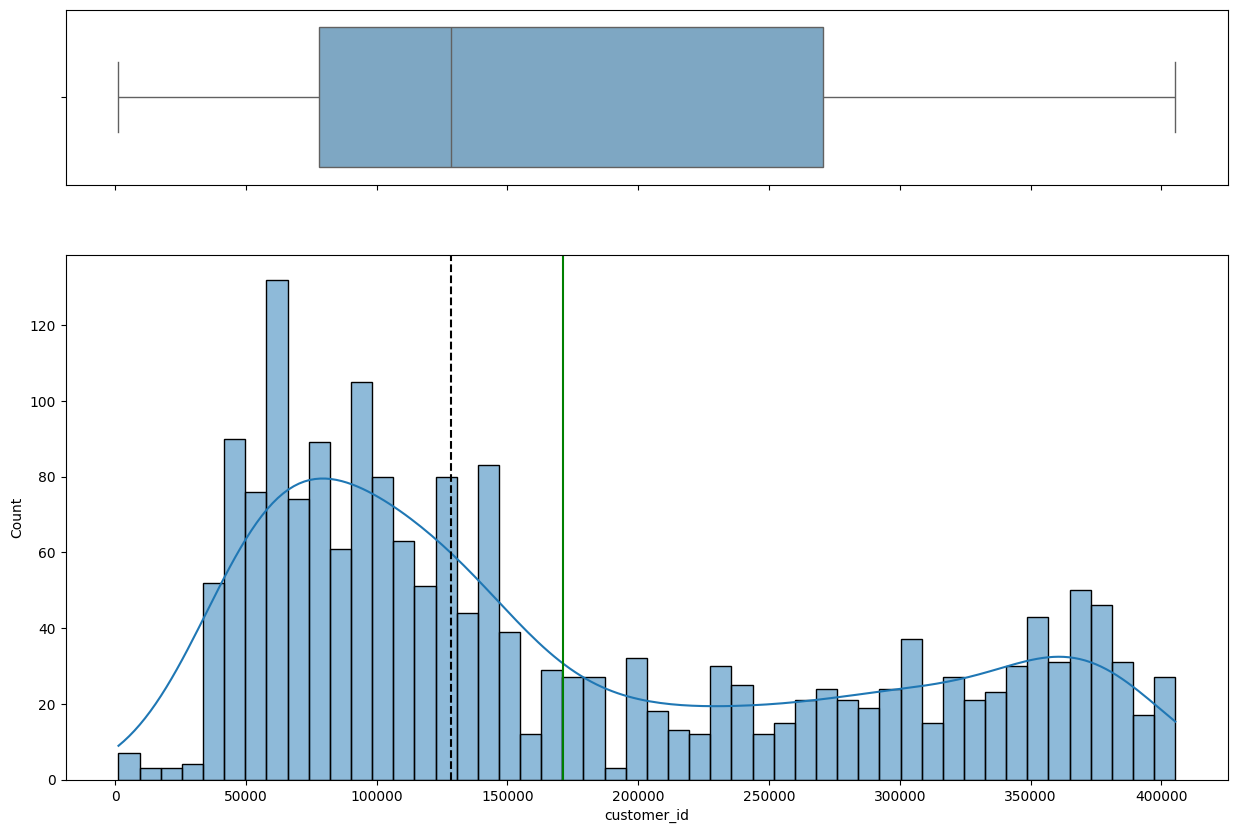

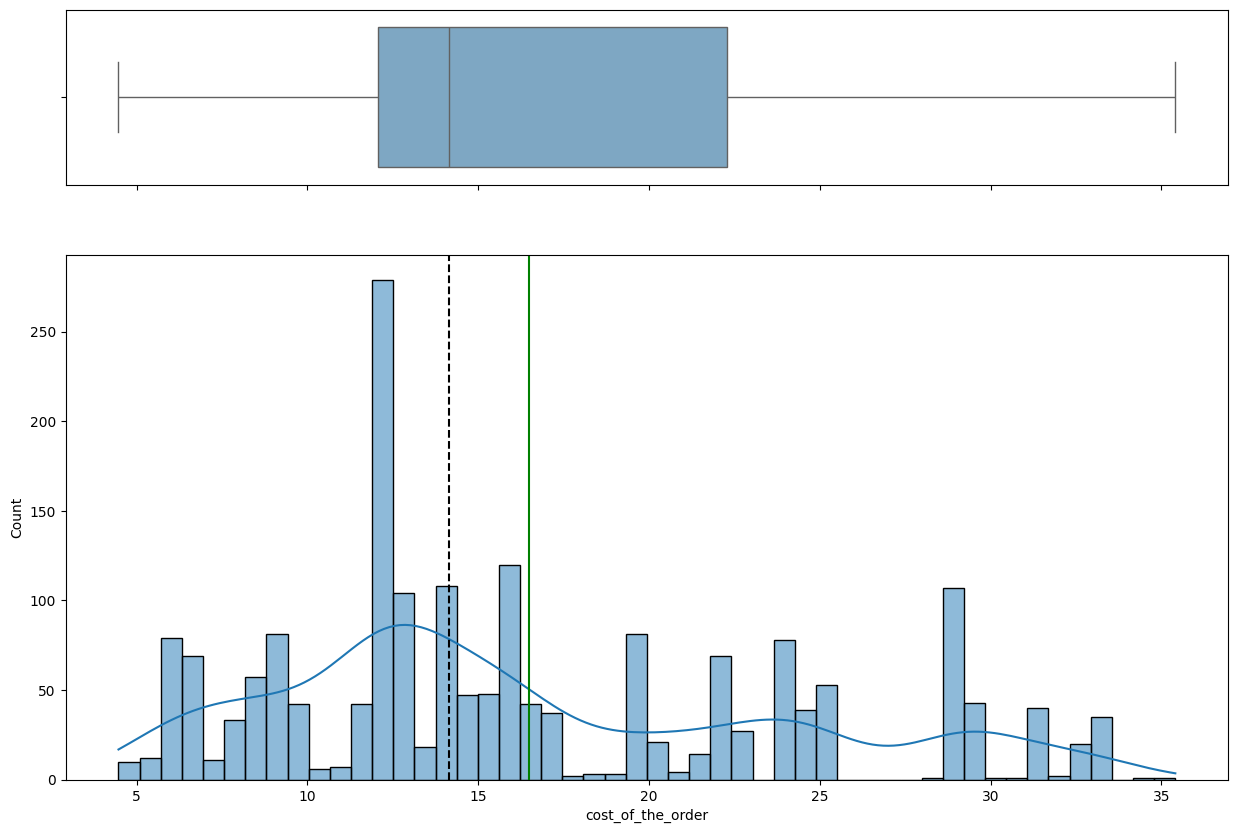

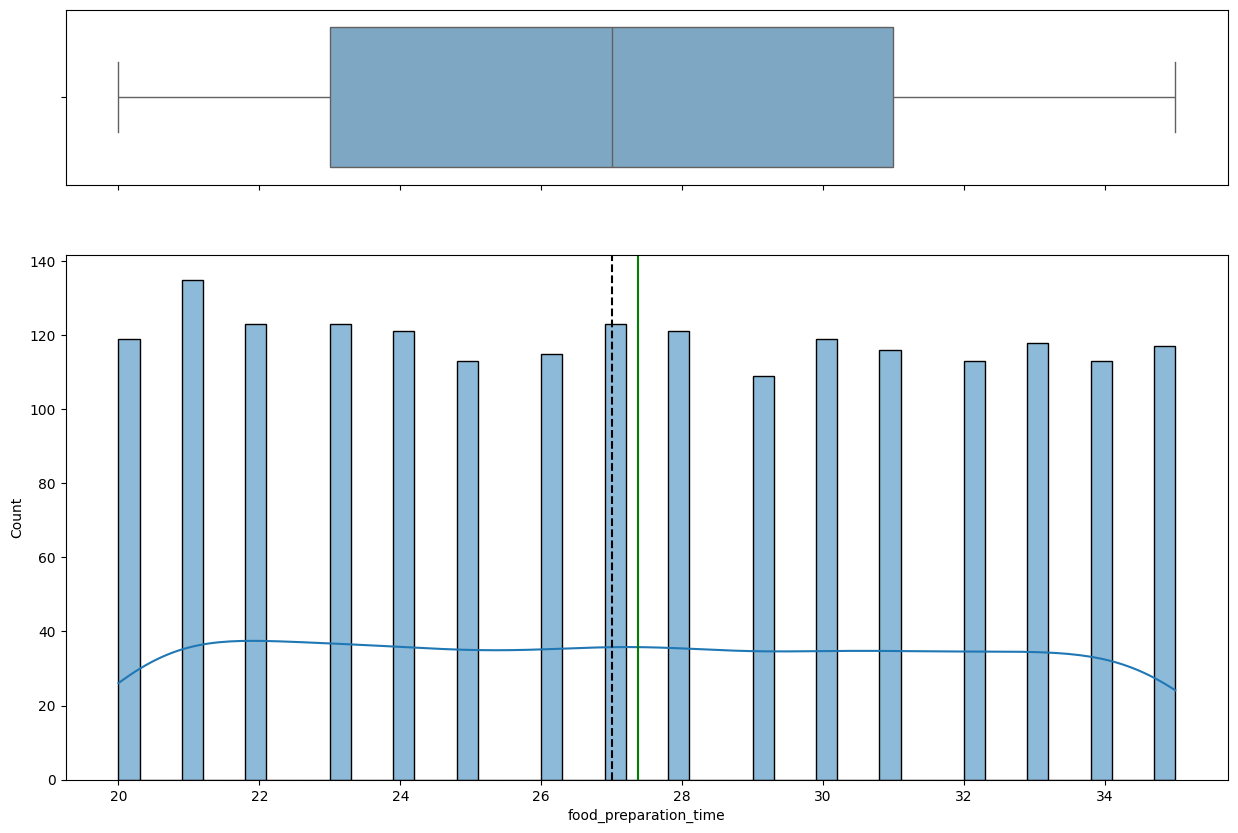

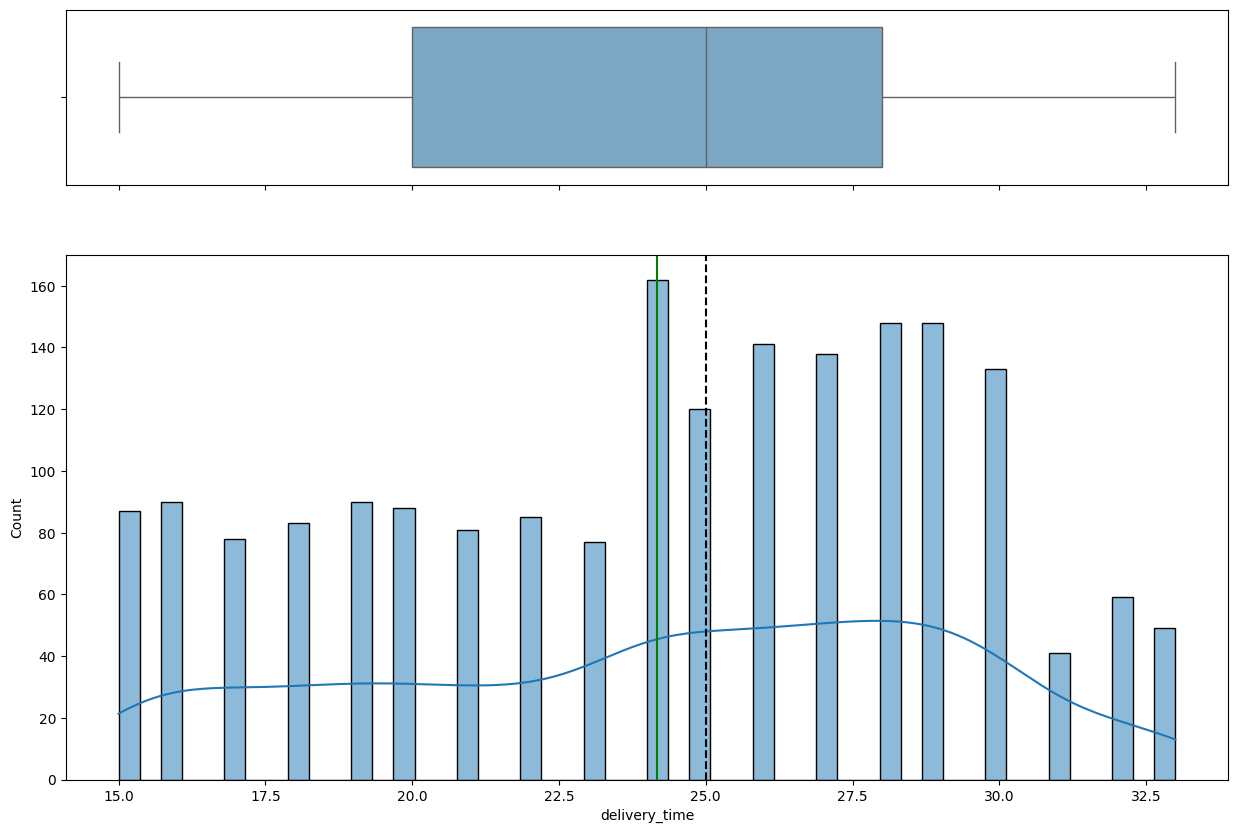

In [ ]:
#LOOPING ALL THE NUMERICAL DATA TO PLOT HISTOGRAM AND BAR CHART

for i in df.select_dtypes(include=np.number).columns.to_list():
  hist_bar_plots(df,i,bins=50,kde=True)

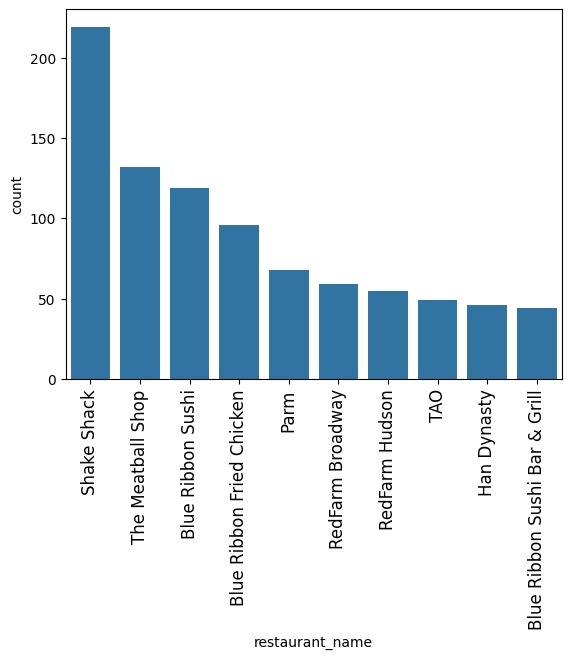

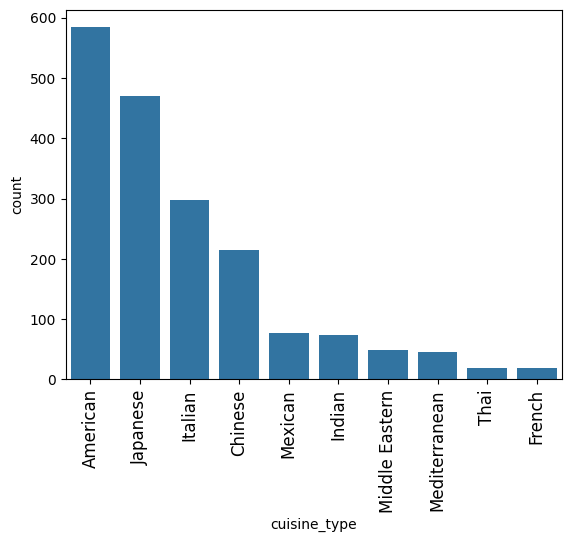

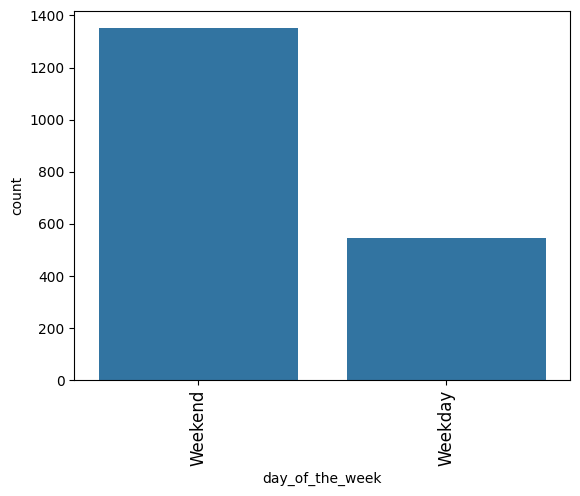

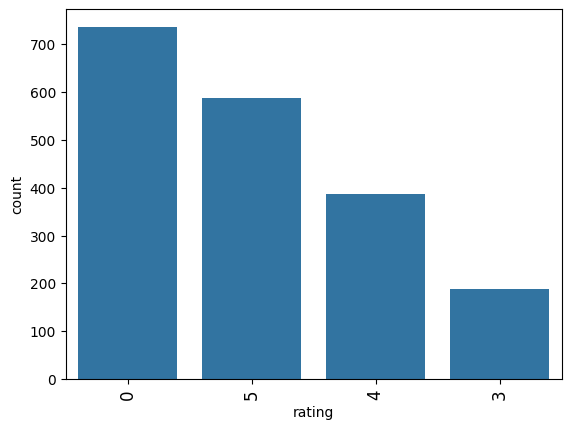

In [ ]:
#Count plot to analyze the frequency of categorical data

for i in df.select_dtypes(include='object').columns.to_list():
  sns.countplot(data=df,x=i,order=df[i].value_counts().index[:10])
  plt.xticks(rotation=90,fontsize=12)
  plt.show()

In [ ]:
#create a labelled bar plot with percentage of total

def labelled_barplot(df,var,n=None,perc=False):
  """
  labeled barplot with percentage at top
  df - dataframe
  var - variable to plot
  n - number of categories to plot
  """

  count = df[var].nunique()
  total = len(df[var])

  if n==None:
    figsize=(count+2,10)
  else:
   figsize=(n+2,10)

  f, ax = plt.subplots(figsize=figsize)
  sns.countplot(
      data=df,
      x=var,
      palette='Paired',
      hue=var,
      order=df[var].value_counts().index[:n],
      ax=ax
  )
  plt.xticks(
      rotation=90,fontsize=12
  )

  for p in ax.patches:

    height = p.get_height()
    width = p.get_x()+p.get_width()/2

    if perc==True:
      labels = '{:.1f}%'.format(100*height/total)
    else:
      labels = p.get_height()

    ax.annotate(
        labels,
        (width,height),
        fontsize=12,
        ha='center',
        textcoords='offset points',
        xytext=(0,5),
        color='black'
    )
  plt.show()


<ipython-input-97-5c761cbe428c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


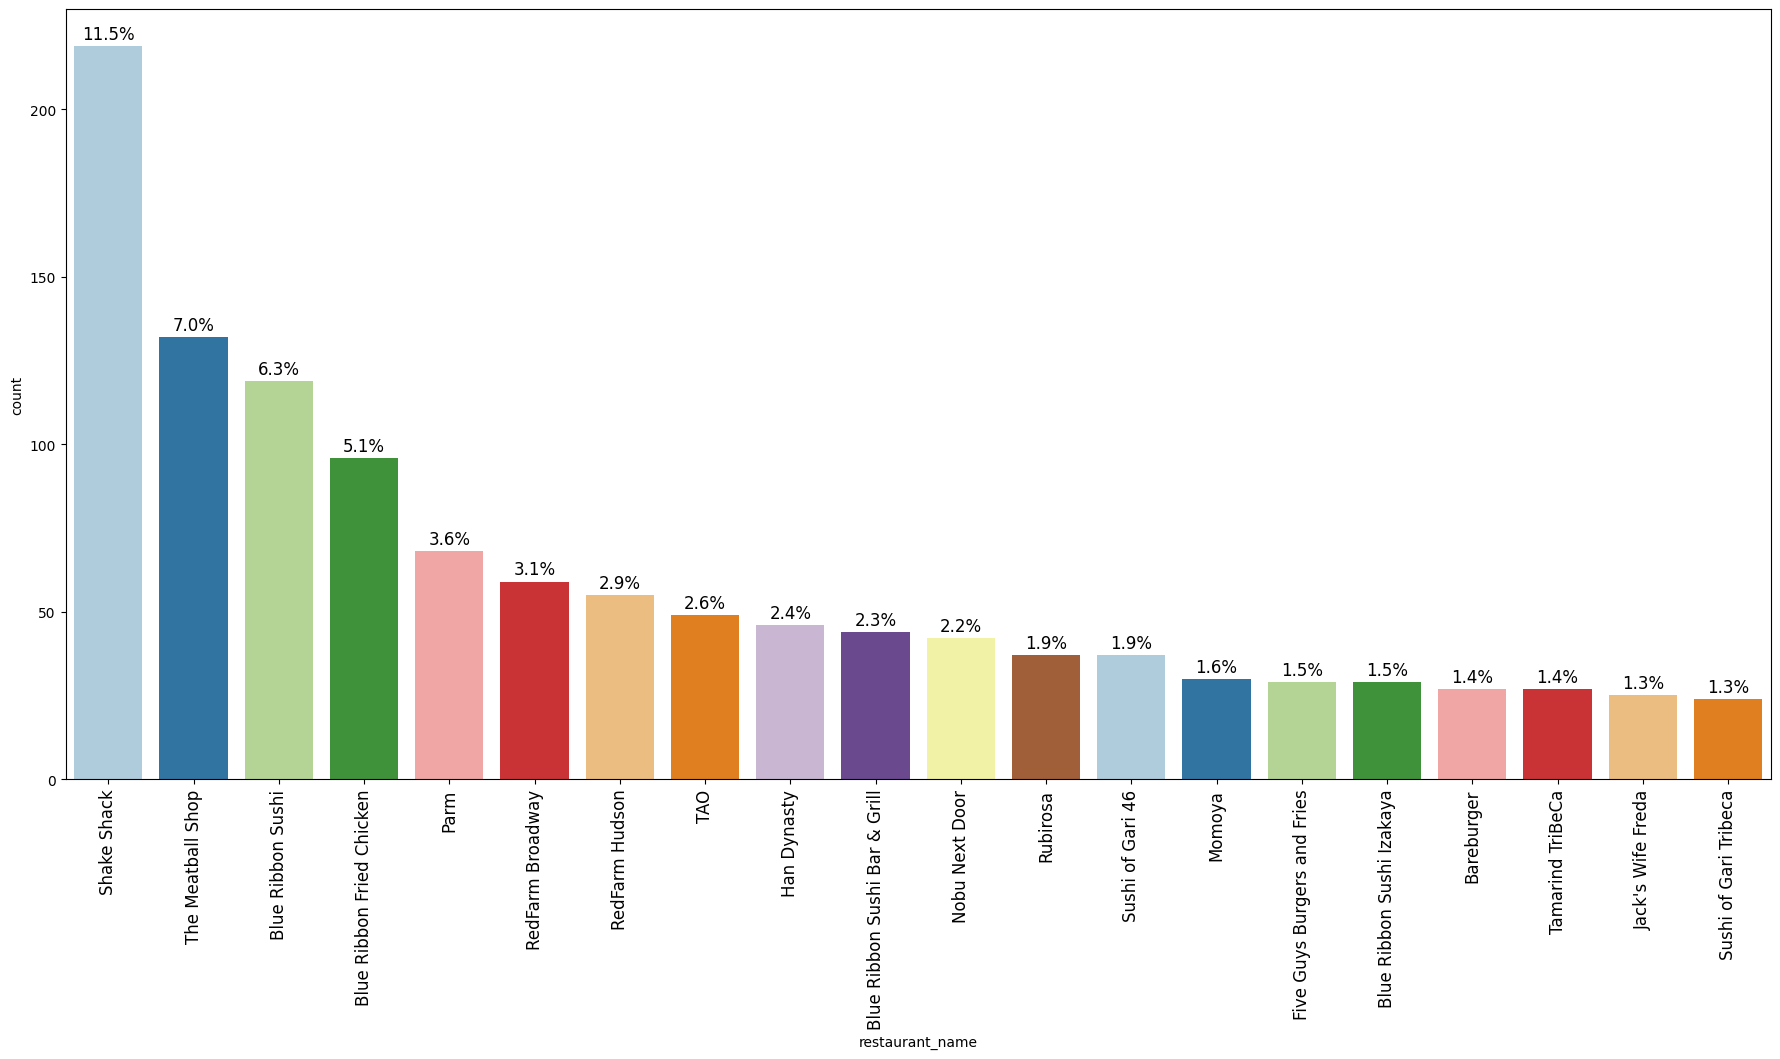

<ipython-input-97-5c761cbe428c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


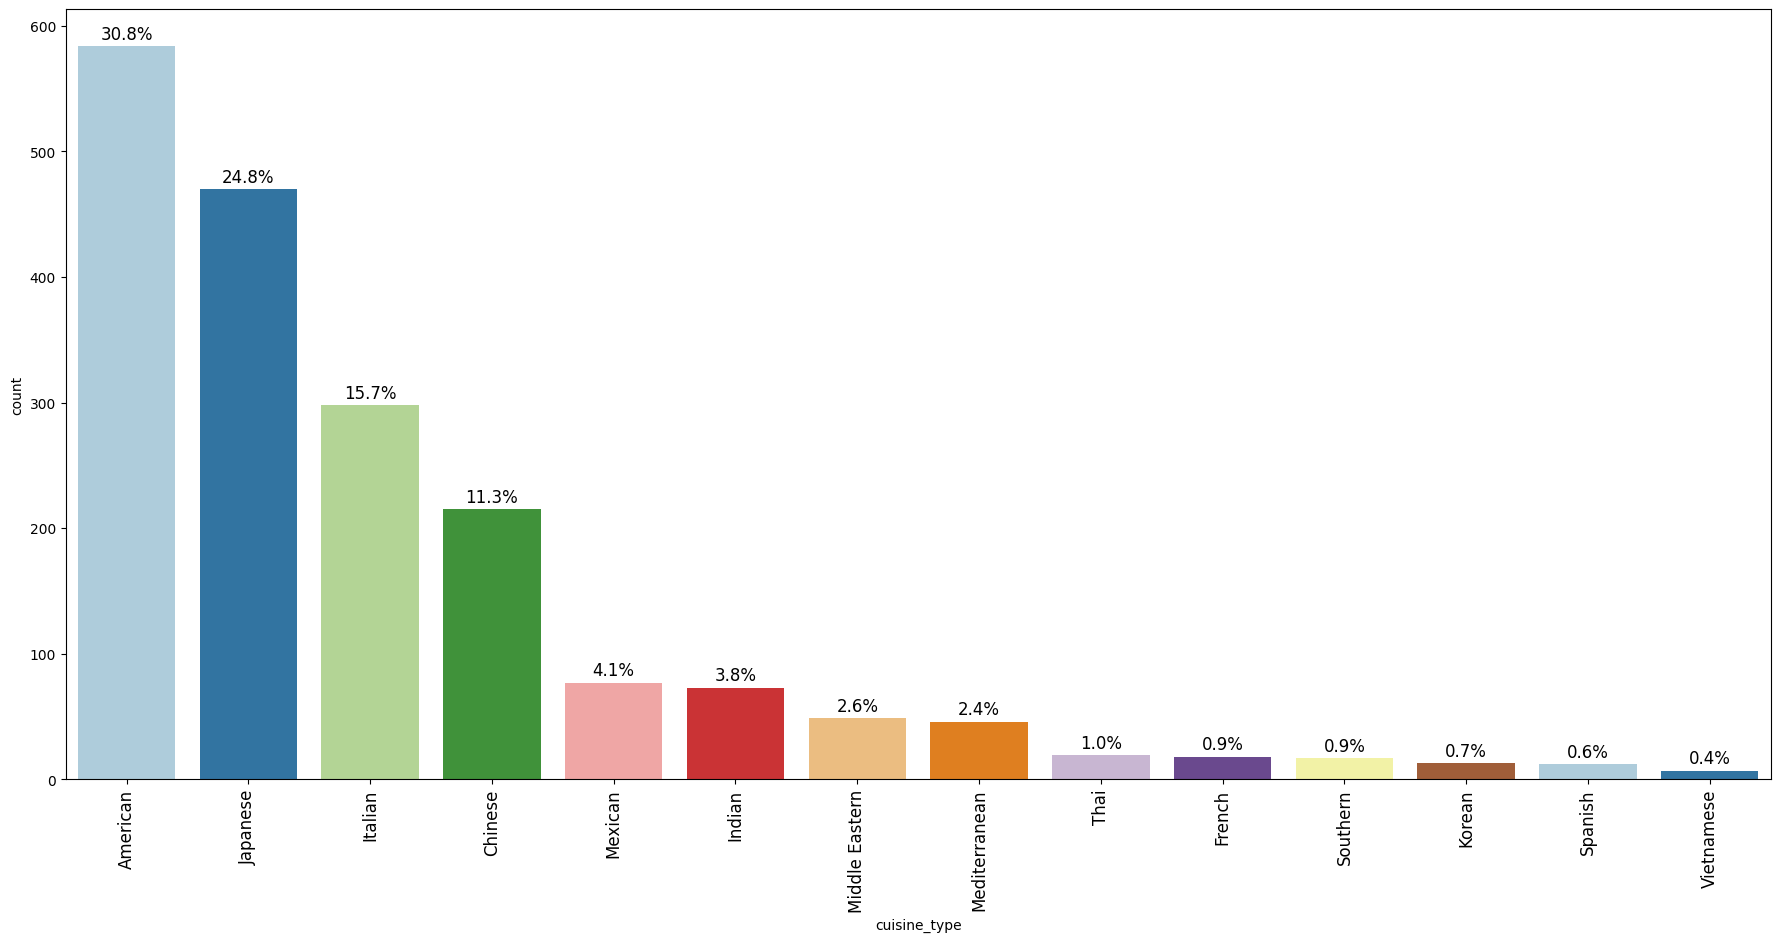

<ipython-input-97-5c761cbe428c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


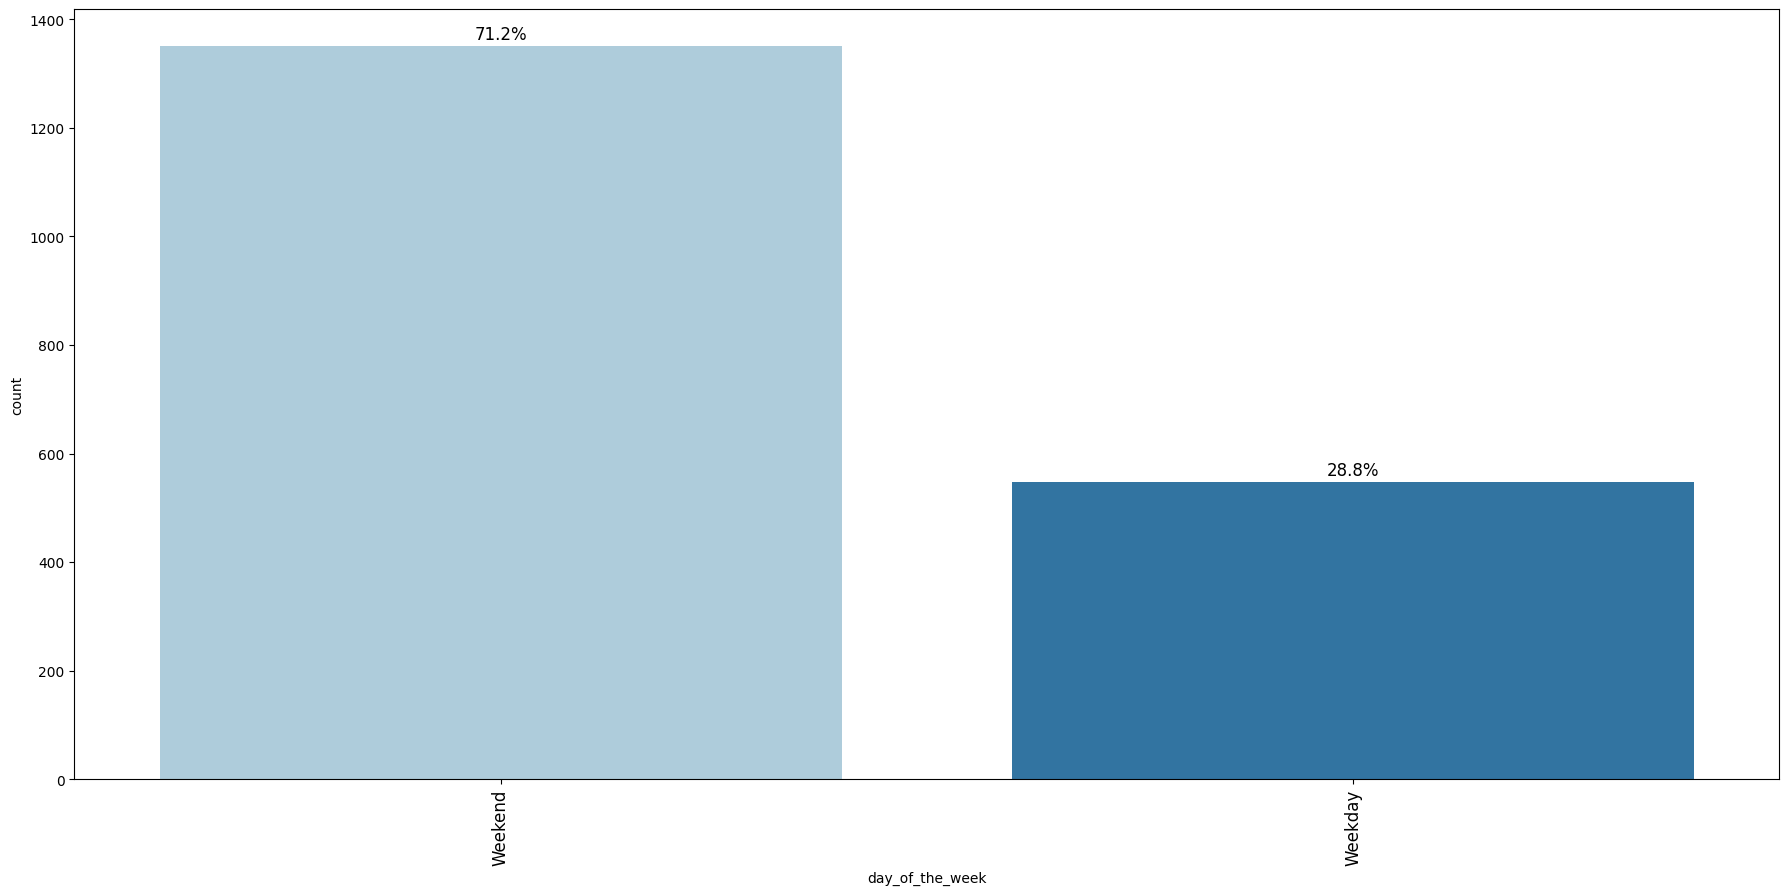

<ipython-input-97-5c761cbe428c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


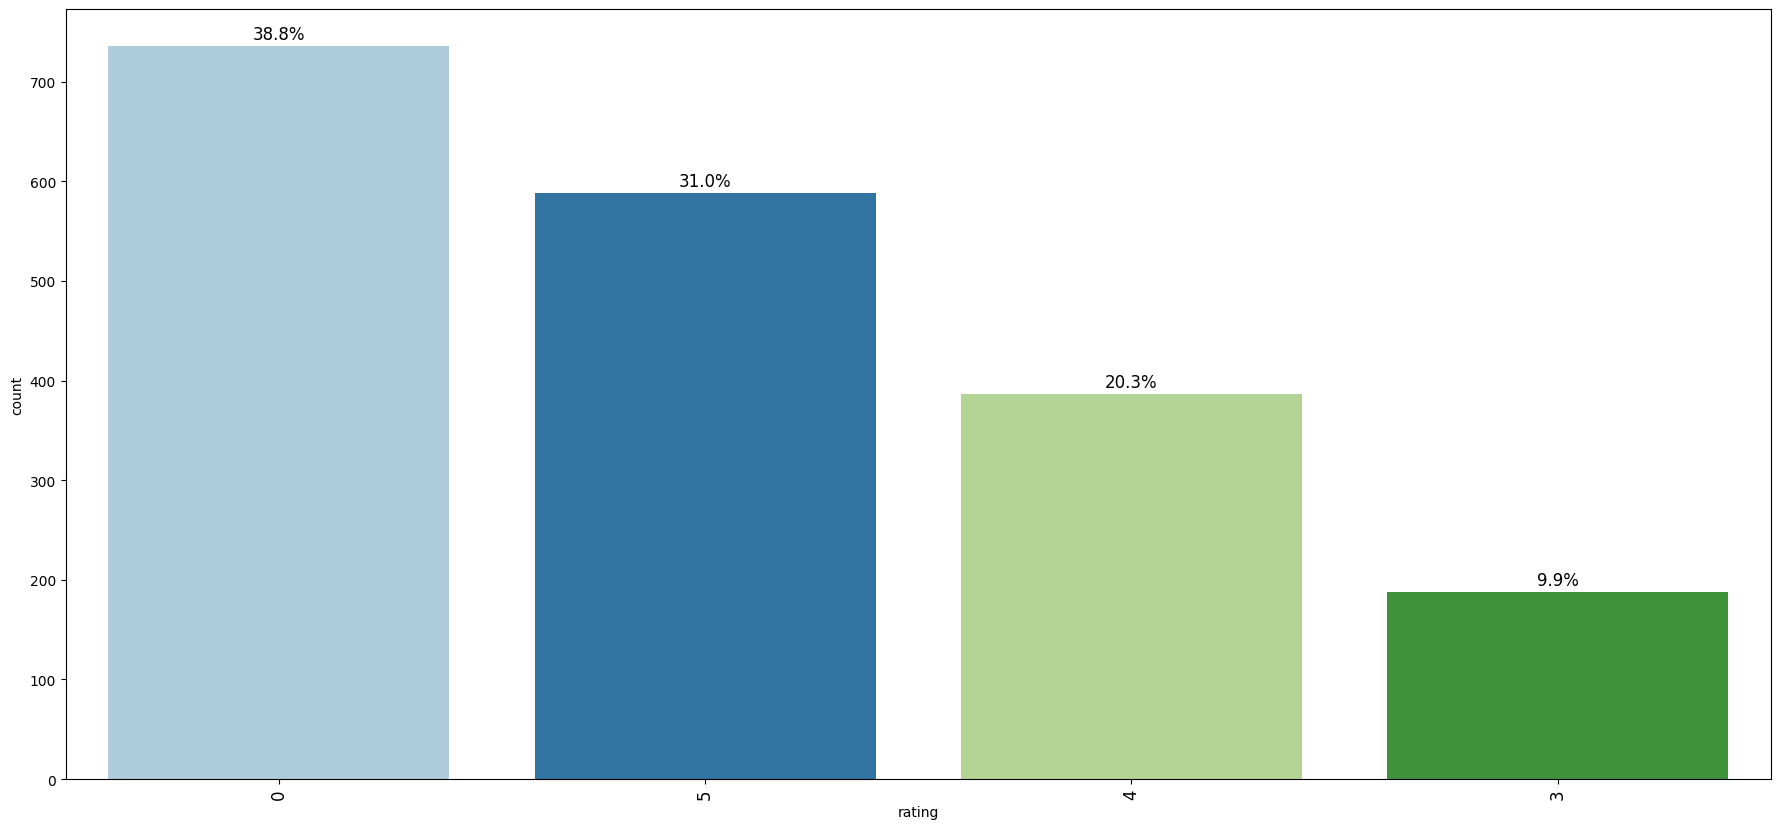

In [ ]:
#LOOPING ALL THE CATEGORICAL DATA TO PLOT HISTOGRAM AND BAR CHART

#Count plot to analyze the frequency of categorical data

for i in df.select_dtypes(include='object').columns.to_list():
  labelled_barplot(df,i,n=20,perc=True)
  plt.show()



# **Answering key questions from univariate analysis**

In [ ]:
#number of unique customers

df['customer_id'].nunique()

#1200 unique customers



1200

In [ ]:
#number of unique cusines

df['cuisine_type'].nunique()

#14 unique cusines

14

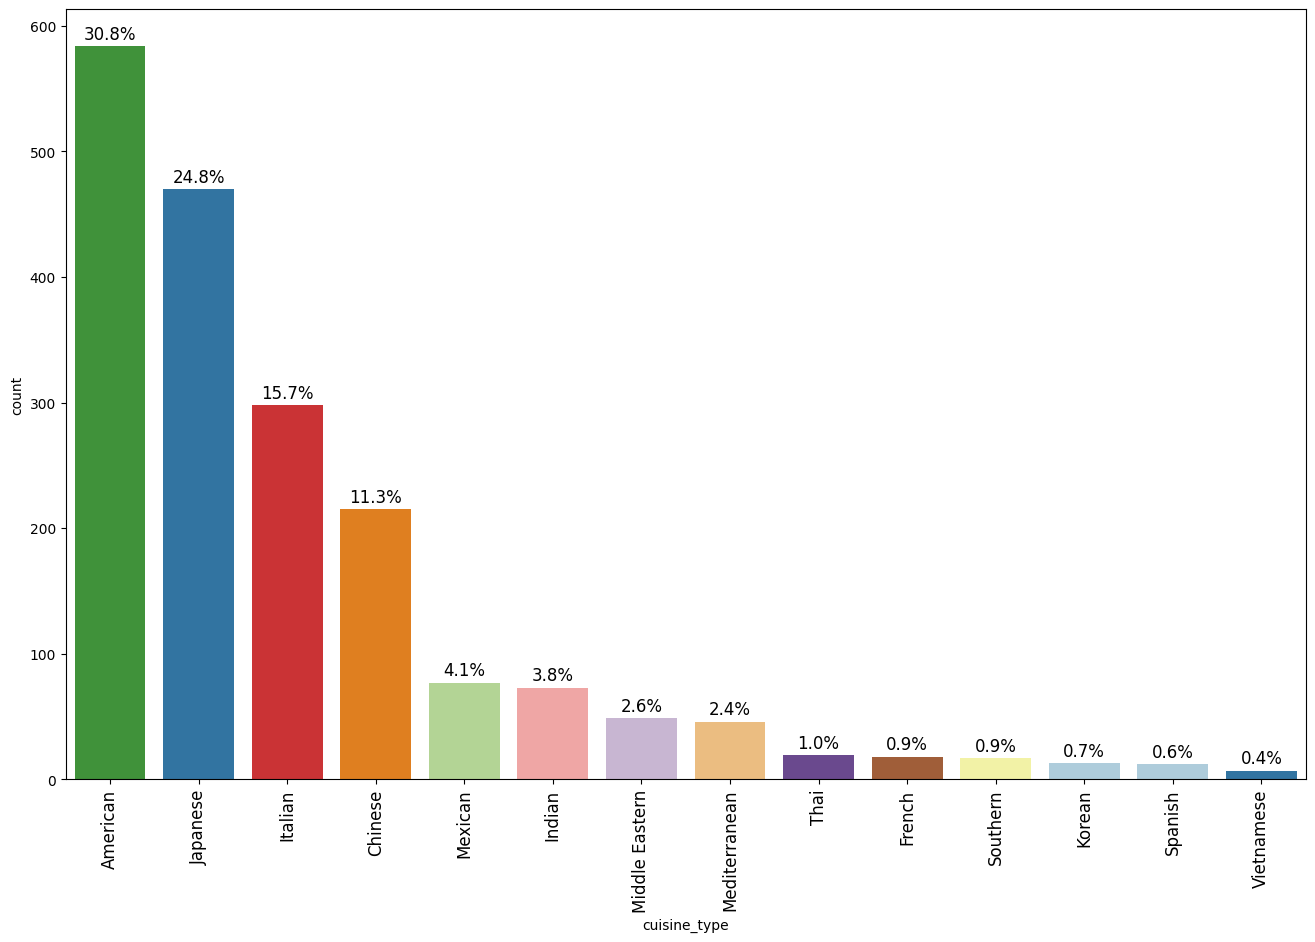

In [ ]:
#count plot for cuisine type

labelled_barplot(df,'cuisine_type',n=None,perc=True)

<ipython-input-115-c92383d6e869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-115-c92383d6e869>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


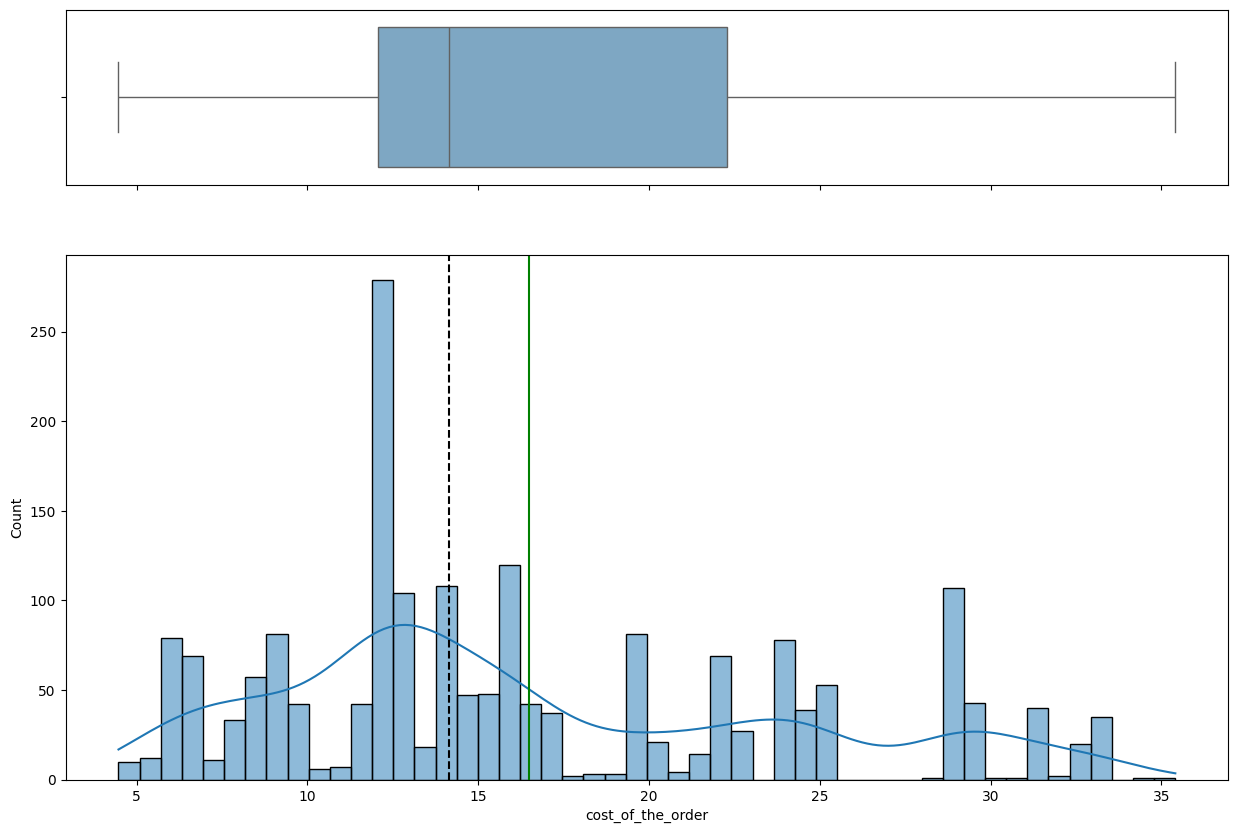

In [ ]:
#Distribution of cost_of_the_order

hist_bar_plots(df,'cost_of_the_order',bins=50,kde=True)



We observe dual peaks at $15 and at $25
Distribution is not normal and its not skewed in one direction.

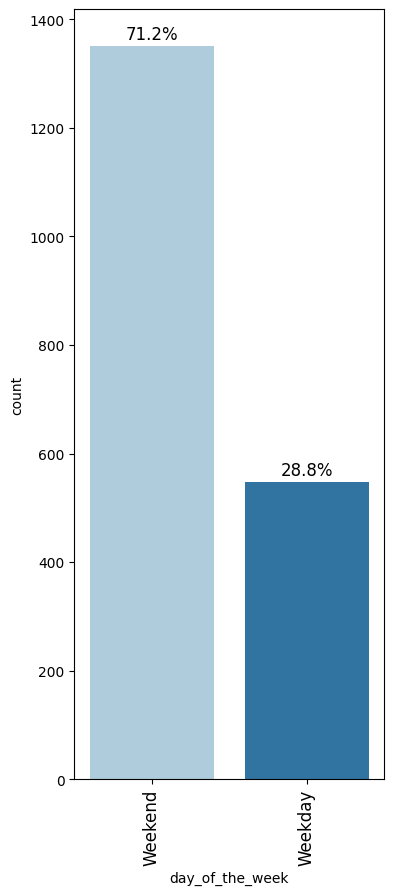

In [ ]:
#Distribution of day_of_the_week

labelled_barplot(df,'day_of_the_week',perc=True)


**72 percent of orders happen on weeekends**

<ipython-input-115-c92383d6e869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-115-c92383d6e869>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


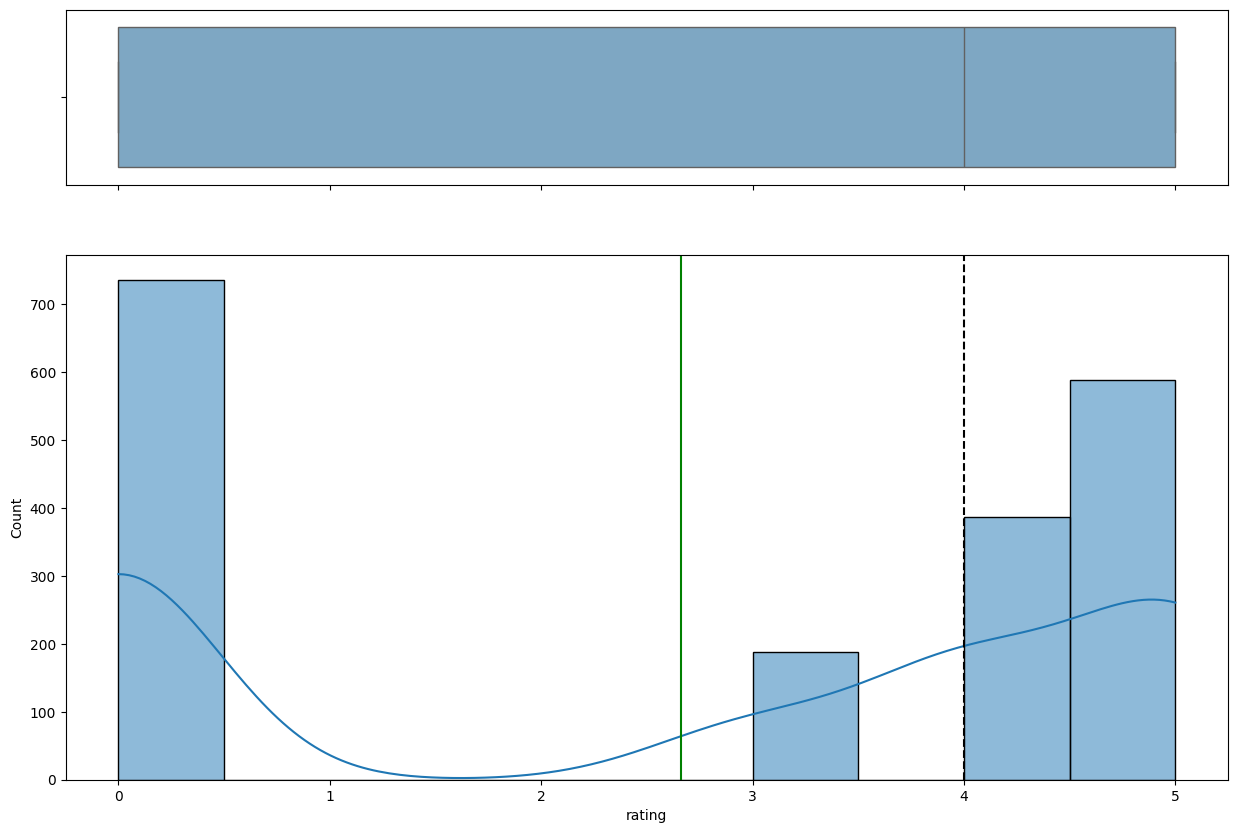

In [ ]:
#Distribution of rating

df['rating']=df['rating'].astype(float)

hist_bar_plots(df,'rating',kde=True)

**Mean rating is around 3 whereas 50 percent of rating is below 4.**


<ipython-input-115-c92383d6e869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-115-c92383d6e869>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


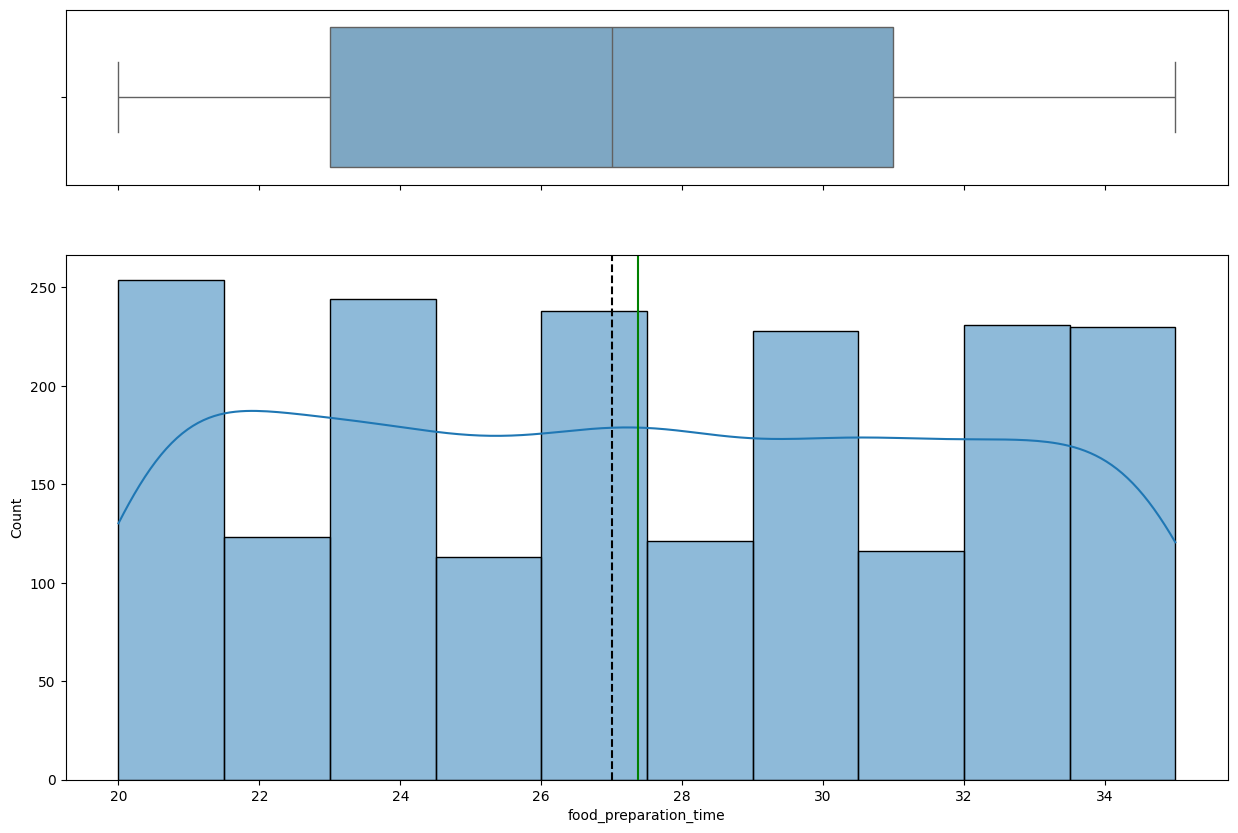

In [ ]:
#distribution of food prep time

hist_bar_plots(df,'food_preparation_time',kde=True)

<ipython-input-115-c92383d6e869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=var,palette='PuBu',ax=ax_bar)
<ipython-input-115-c92383d6e869>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


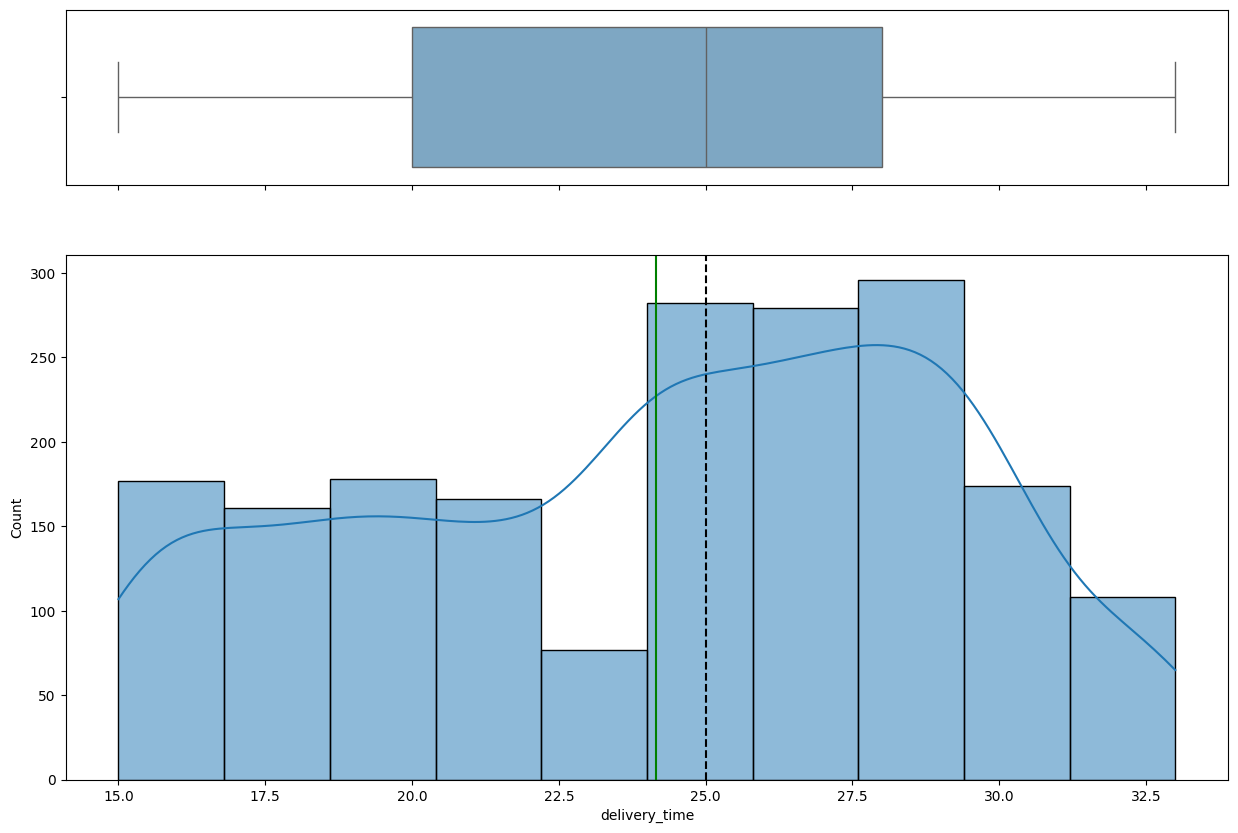

In [ ]:
#distribution of food delivery time

hist_bar_plots(df,'delivery_time',kde=True)

**Average time taken to deliver food is 23 minutes and 50 percent of food is prepped in less than 25 minutes.**

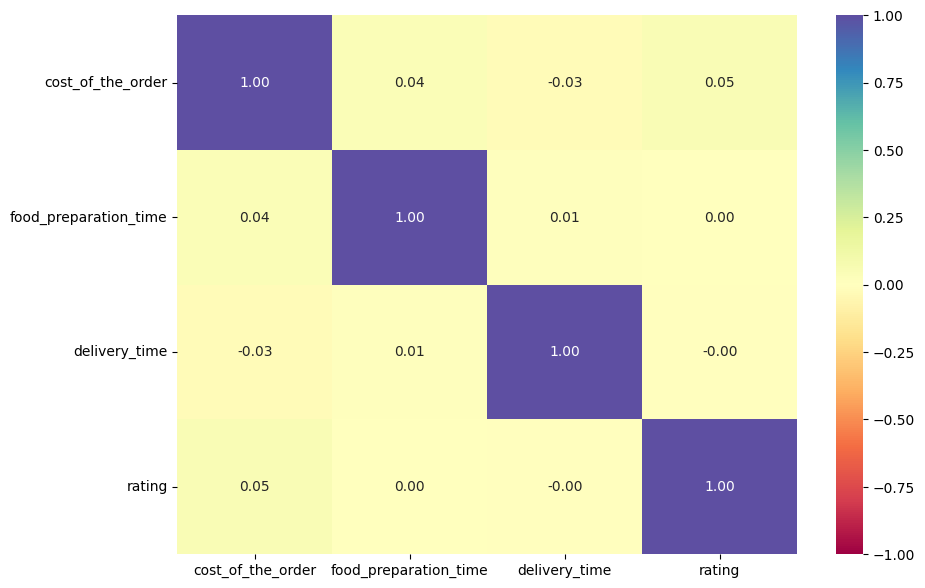

In [24]:
df['rating'].astype(float)
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(10,7))
sns.heatmap(df[col_list].corr(),
            annot=True,
            fmt='.2f',
            vmin=-1,
            vmax=1,
            cbar=True,
            cmap='Spectral')
plt.show()

In [ ]:
#There seems to no high col_relation between the variables.

In [ ]:
df.groupby(['restaurant_name'],as_index=False)['order_id'].nunique().sort_values(by='order_id',ascending=False).head(5).rename(columns={'restaurant_name':'Restaurant','order_id':'Total_orders'})

,Restaurant,Total_orders
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


In [ ]:
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
#Popular cuisine on weekends

top_cusine = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(5)
top_cusine.index.to_list()

['American', 'Japanese', 'Italian', 'Chinese', 'Mexican']

## #American Cuisine is the most popular cuisine on weekend

**Percentage of orders costing more than 20 dollars**
*italicized text*

In [ ]:
print('{:.2f}%'.format(df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100) +' orders cost more than 20 dollars')

29.24% orders cost more than 20 dollars


In [ ]:
perc = df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100
round(perc,2)

29.24

#Average order delivery time

In [ ]:
#Average order delivery time

print('{} minutes'.format(round(df['delivery_time'].mean(),2)))

print('AVerage order delivery time is '+'{:.2f}'.format(round(df['delivery_time'].mean(),2))+ ' minutes')

24.16 minutes
AVerage order delivery time is 24.16minutes


#customer id with most orders

In [ ]:
#customer id with most orders

print('Customer with most orders is ' + (df['customer_id'].value_counts().head(3).index[:3]).astype(str) + ' with ' + (df['customer_id'].value_counts().head(3).values[:3]).astype(str) + ' orders')

Index(['Customer with most orders is 52832 with 13 orders',
       'Customer with most orders is 47440 with 10 orders',
       'Customer with most orders is 83287 with 9 orders'],
      dtype='object', name='customer_id')


# MultiVariate Analysis

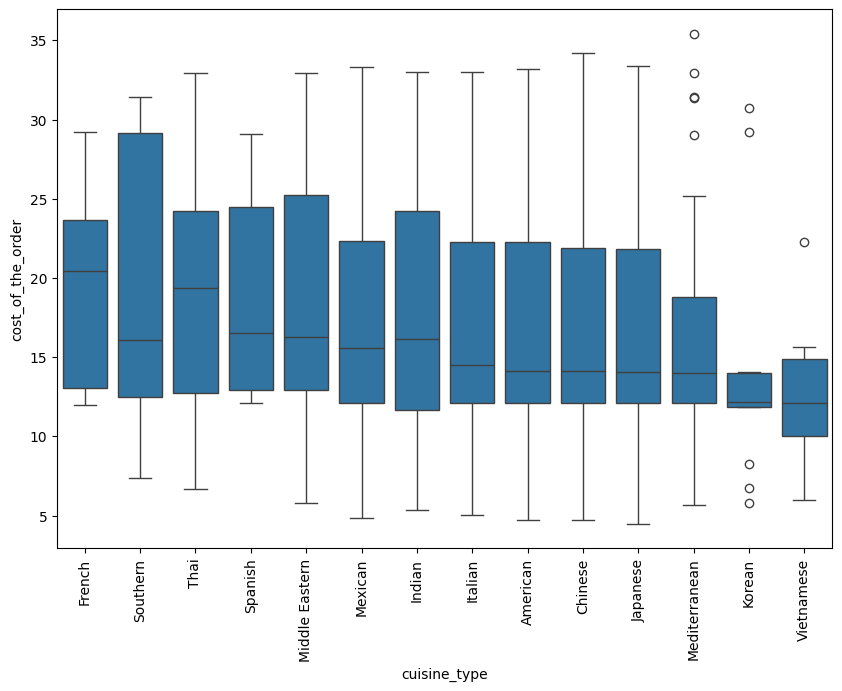

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order',order=df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

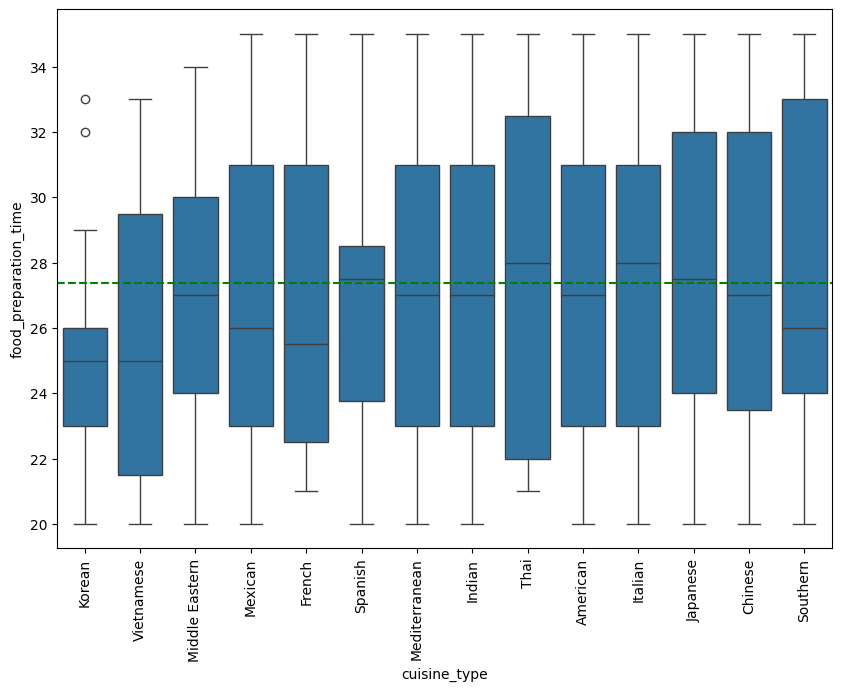

In [ ]:
#relationship between cuisine_type and preparation_time

f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time',order=df.groupby(['cuisine_type'])['food_preparation_time'].mean().sort_values().index,ax=ax)
plt.xticks(rotation=90)
ax.axhline(df['food_preparation_time'].mean(),color='green',linestyle='--')
plt.show()

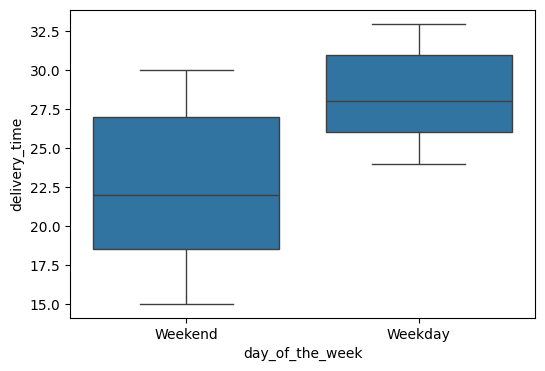

In [ ]:
#Relationship between day of the week and delivery time

plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time',order=df.groupby(['day_of_the_week'])['delivery_time'].mean().sort_values().index)
plt.show()

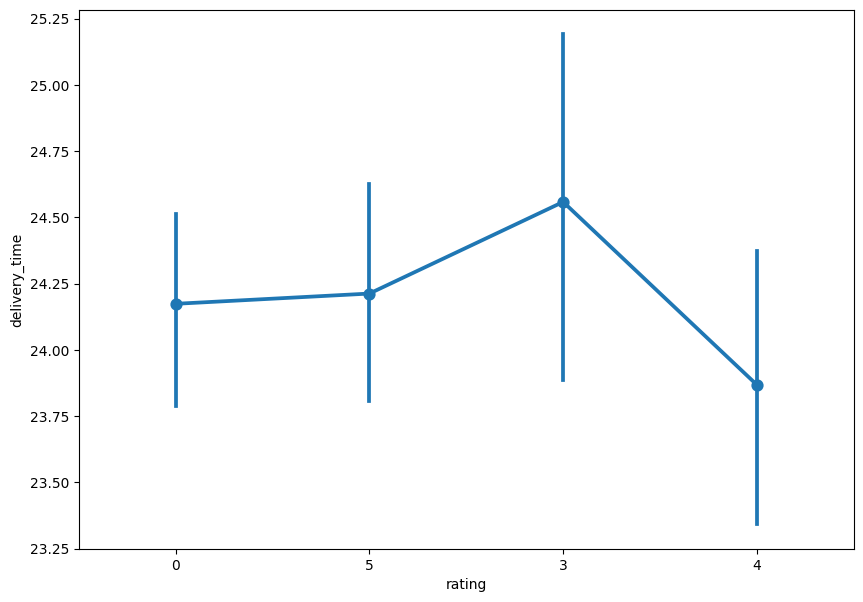

In [13]:
#Rating vs Delivery Time

#plt.figure(figsize=(10,7))
#sns.boxplot(data=df,x='rating',y='delivery_time')
#plt.show()


plt.figure(figsize=(10,7))
sns.pointplot(data=df,x='rating',y='delivery_time')
plt.show()

Faster delivery has led to rating 4

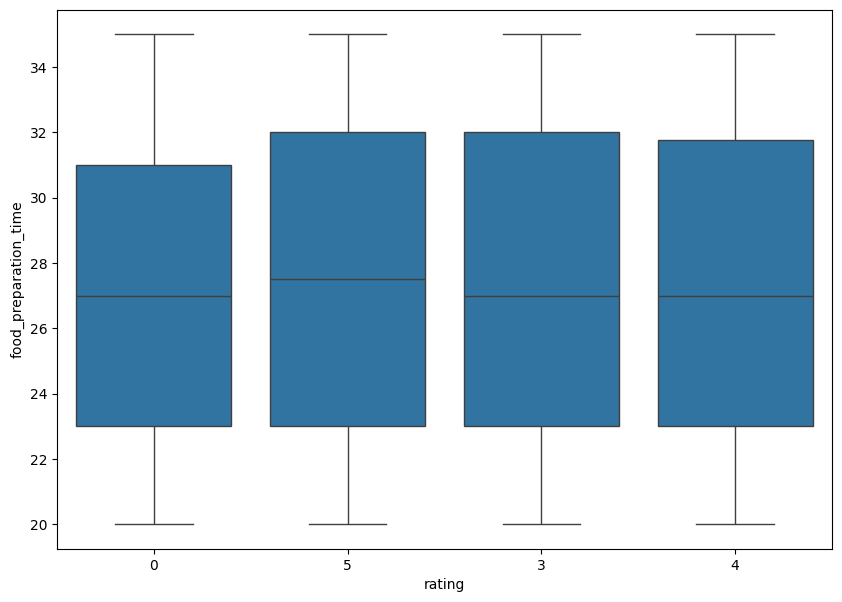

In [15]:
#Rating vs food prep time

plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='rating',y='food_preparation_time')
plt.show()

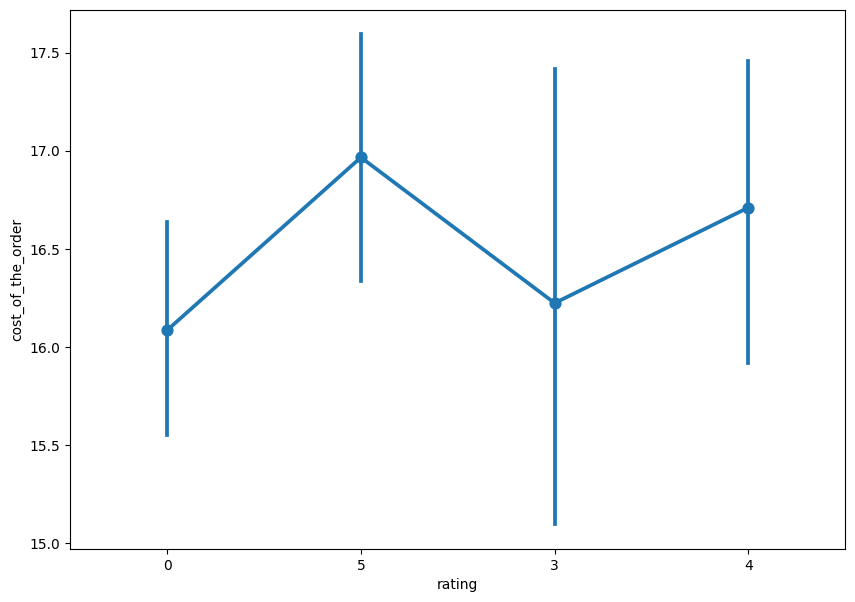

In [21]:
#Rating vs Cost of order

f,ax= plt.subplots(figsize=(10,7))
sns.pointplot(data=df,x='rating',y='cost_of_the_order',ax=ax)
#ax.axhline(df['cost_of_the_order'].mean(),color='green',linestyle='--')
plt.show()

# Promotional offer Restaurant

In [23]:
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1575,1478353,369809,Momoya,Japanese,12.23,Weekday,3,32,24
1533,1477830,61212,Tamarind TriBeCa,Indian,15.77,Weekend,5,25,29
1298,1476709,105837,Nobu Next Door,Japanese,11.11,Weekend,0,25,30
1656,1478424,304052,Parm,Italian,11.59,Weekday,5,35,29
60,1476896,388918,Blue Ribbon Fried Chicken,American,24.25,Weekend,0,28,21


In [84]:
#converting rating to float
df['rating'] = df['rating'].astype(float)
df_rated = df[df['rating']!=0]

#Counting rating for restaurant;
resturant_rating_count=df_rated.groupby(['restaurant_name'],as_index=False)['rating'].count()
#filtering reaturants whose rating count is more than 50
high_restaurant = resturant_rating_count[resturant_rating_count['rating']>50]['restaurant_name']

#filtering restaurants with average greater than 3 from restaurants with review count greater than 50
avg_rating = df_rated[df_rated['restaurant_name'].isin(high_restaurant)].groupby('restaurant_name',as_index=False)['rating'].mean()
avg_rating[avg_rating['rating']>3]['restaurant_name']


,restaurant_name
0,Blue Ribbon Fried Chicken
1,Blue Ribbon Sushi
2,Shake Shack
3,The Meatball Shop


# Revenue Based on Condition

In [92]:
#revenue based on conditions

df['cost_of_the_order'] = df['cost_of_the_order'].astype(float)

def compute_rev(x):
  if (x>20):
    return x*0.25
  elif (x>5):
    return x*0.15
  else:
    return 0

df['revenue']=  df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


# Percentage of orders with delivery greater than 60 minutes

In [5]:
print('Percentage of orders greater than 60 minutes is',round(df[(df['delivery_time']+df['food_preparation_time'])>60].shape[0]/len(df)*100,2))

Percentage of orders greater than 60 minutes is 10.54


# Average Delivery time - accross Days of the week

In [17]:
weekdata = df.groupby(['day_of_the_week'],as_index=False)['delivery_time'].mean().rename(columns={'delivery_time':'Average_delivery_time'})

<Axes: xlabel='day_of_the_week', ylabel='Average_delivery_time'>

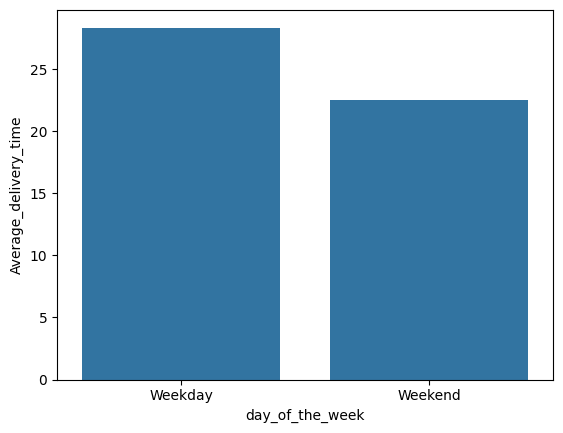

In [20]:
sns.barplot(data=weekdata,x='day_of_the_week',y='Average_delivery_time')

<Axes: xlabel='day_of_the_week', ylabel='Average_delivery_time'>

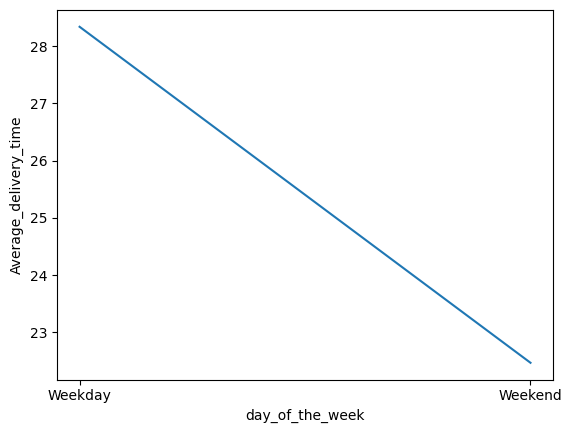

In [22]:
sns.lineplot(data=weekdata,x='day_of_the_week',y='Average_delivery_time')

**Time taken to deliver on weekday is 28 minutes whereas time taken to deliver on weekend is 22 minutes.**